# Project 2: Milestone 2 - White Paper (Code)
### DSC680-T301 Applied Data Science
### Joshua Greenert
### 4/15/2023

In [1]:
# Set some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the dataframes
df_telecom = pd.read_csv('telecomChurn.csv')
df_bank = pd.read_csv('bankChurn.csv')

## Data Preparation

In [2]:
# Prepare the telecom data.
# Replace all values of yes and no values for churn column to 1s and 0s; can't use dummies 
# since they would make separate columns
df_telecom['Churn'].replace({'Yes': 1, 'No': 0}, inplace = True)

# Select the columns to make dummies for.
dummy_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

df_telecom = pd.concat([df_telecom, pd.get_dummies(df_telecom[dummy_columns])], axis = 1)

# drop the original categorical columns that are now represented as dummies
df_telecom.drop(dummy_columns, axis = 1, inplace = True)

# drop the customer Id column as it can lead to overfitting/noise.
df_telecom.drop('customerID', axis = 1, inplace = True)

# Show the head
df_telecom.head(3)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.5,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [3]:
# Prepare the bank data.
# Make dummies for the country and gender columns
dummy_columns = [ 'gender']

# Create dummies and add them to the dataframe.
df_bank = pd.concat([df_bank, pd.get_dummies(df_bank[dummy_columns])], axis = 1)

# drop the original categorical columns that are now represented as dummies
df_bank.drop(dummy_columns, axis = 1, inplace = True)

# Drop the columns that will hold no value or will create too many features.
df_bank.drop(['customer_id', 'country'], axis=1, inplace=True)

df_bank.head(3)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0


## Visualizations

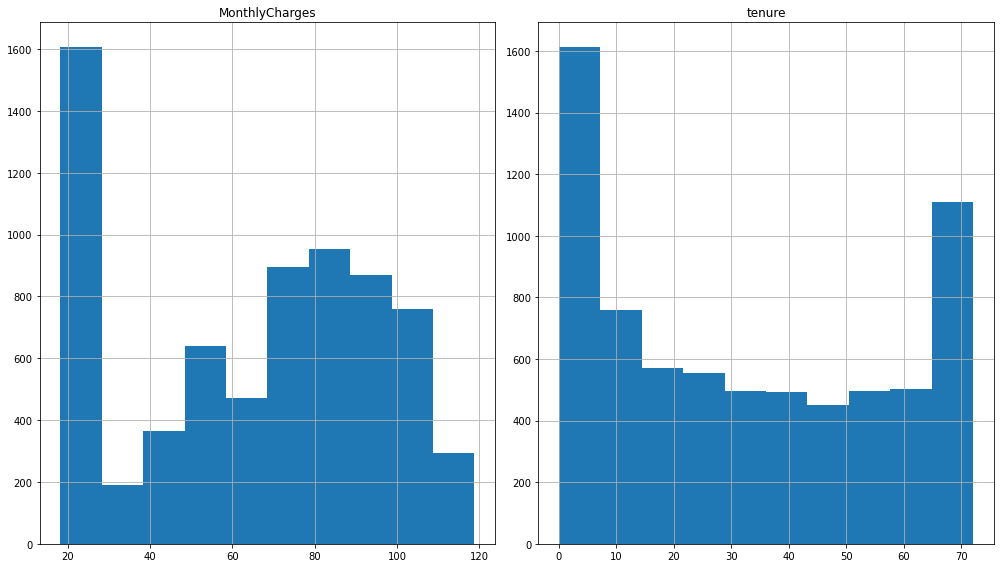

In [6]:
# create histograms of tenure and MonthlyCharges
df_telecom[['MonthlyCharges', 'tenure']].hist(figsize=(14, 8))
plt.tight_layout()
plt.show()

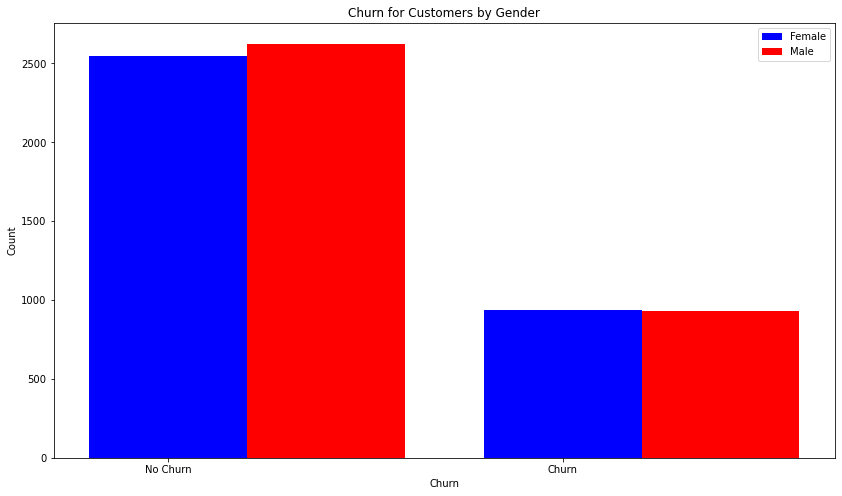

In [35]:
# Filter the data to include only females and males, and the Churn column
gender_df = df_telecom.loc[df_telecom['gender_Female'].isin([1,0]) & df_telecom['gender_Male'].isin([1,0]), ['gender_Female', 'Churn']]

# Group the data by gender and Churn, and count the number of records
gender_churn_counts = gender_df.groupby(['gender_Female', 'Churn']).size().reset_index(name='count')

# Create a bar plot for churn by gender
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars for female churn counts
ax.bar(x=[0, 1], height=gender_churn_counts.loc[gender_churn_counts['gender_Female'] == 1]['count'], 
       width=0.4, color='blue', align='edge', label='Female')

# Plot the bars for male churn counts
ax.bar(x=[0.4, 1.4], height=gender_churn_counts.loc[gender_churn_counts['gender_Female'] == 0]['count'], 
       width=0.4, color='red', align='edge', label='Male')

# Set the x-axis labels and title
ax.set_xticks([0.2, 1.2])
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Churn for Customers by Gender')

# Add the legend
ax.legend()

# Display the chart
plt.show()

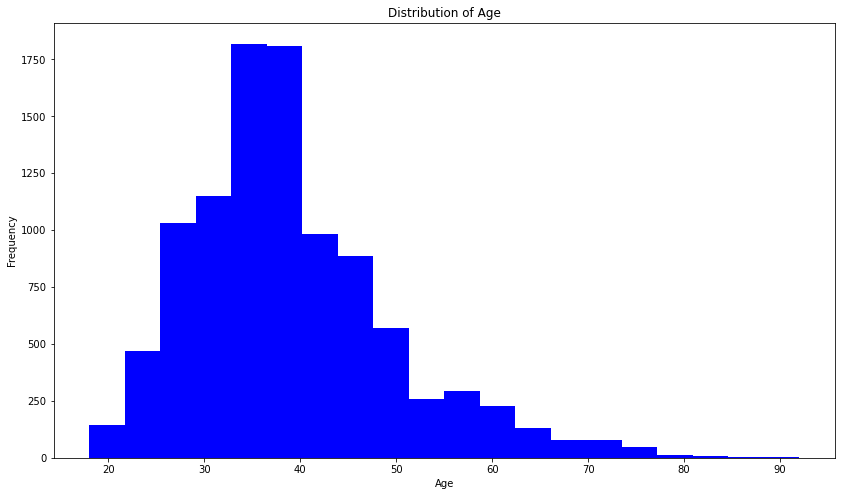

In [27]:
# Create a histogram of age
plt.figure(figsize=(14, 8))
plt.hist(df_bank['age'], bins=20, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

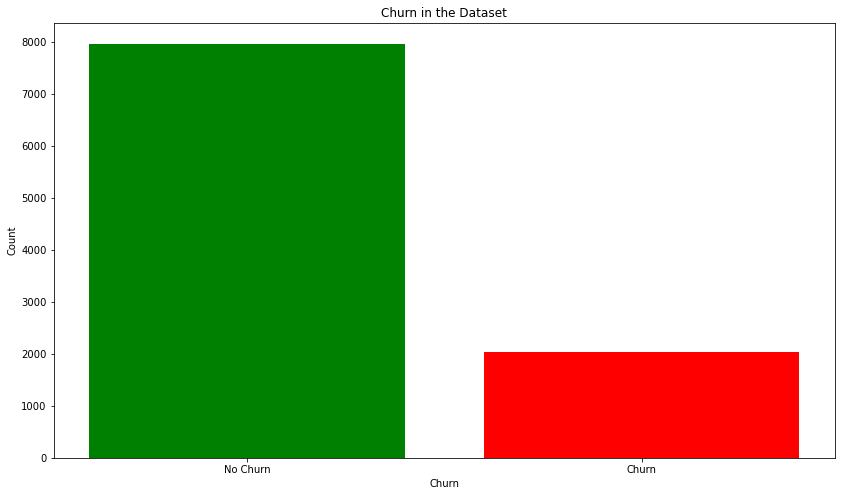

In [28]:
# Group the data by Churn, and count the number of records
churn_counts = df_bank.groupby(['churn']).size().reset_index(name='count')

# Create a bar plot of churn
plt.figure(figsize=(14, 8))
plt.bar(['No Churn', 'Churn'], churn_counts['count'], color=['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn in the Dataset')
plt.show()

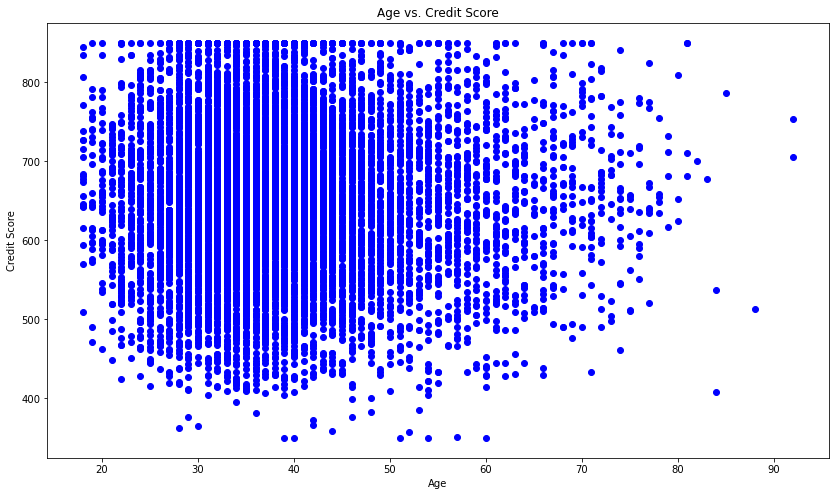

In [29]:
# Create a scatter plot of age vs. credit_score
plt.figure(figsize=(14, 8))
plt.scatter(df_bank['age'], df_bank['credit_score'], color='blue')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Age vs. Credit Score')
plt.show()